#  Assignment 3

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Niek de Visscher | 10667474 | niekdevisscher@hetnet.nl |
| Leon Smits | 10500731 | leonmarijnsmits@gmail.com|
| Daniël van lier | 10639861 | danielvanlier@gmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/hConduu.jpg'/>
<img src='http://i.imgur.com/r4tIPrA.jpg?1'/>
<img src='http://i.imgur.com/KbRwRFz.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Pandas assignment

## [Part one](http://nbviewer.jupyter.org/url/maartenmarx.nl/teaching/ISatWork/Assignments/ASSIGNMENTS/baseball.ipynb)

Copy and paste the exrcises from this file into this notebook, and put your answers behind each question.

## Part two: American baby names

We continue the analysis of American baby names started in <http://maartenmarx.nl/teaching/ISatWork/Slides/Week1_slides.ipynb#Chapter-2:-analyse-baby-names>

You must copy some of the pandas commands from the slides to get started. Do that here too. 

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,5)

### Problem 1
In 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.

#### Problem 1(a)
Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas DataFrame and show the head of each table.

Hint Use the requests, StringIO and zipfile modules to get from the web.

Hint 2 A local copy is available in the Data folder of our course.

In [2]:
#Part 1:
import StringIO
import requests
#Problem 1a:
url = "https://github.com/ndevisscher/Data-Science/blob/master/Week%203/Salaries.csv"
r = requests.get(url).content
s = pd.read_csv('Salaries.csv')
s.head()

yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667

In [3]:
t = pd.read_csv('Teams.csv')
t.head()

yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       South End Grounds I         NaN   
3 NaN  0.85      Washington Olympics          Olympics Grounds         NaN   
4 NaN  0.83         New York Mutuals  Union Grounds (Brooklyn)         NaN   

   BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0  102   98       ATH             PH1          PH1  
1  104  102       CHI             CH1          CH1  
2  103   98       BOS             BS1          BS1  
3   94   98       OLY             WS3          WS3  
4   90   88       NYU             NY2          NY2  

[5 rows x 48 columns]

### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [4]:
#Question 1b:
summary = s.groupby(['teamID', 'yearID']).sum()
summary.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

### Problem 1(c)
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

Hint: Merge the DataFrames using teamID and yearID.

In [6]:
#Question 1c:
#The wins per team per year
teams = t.loc[:,['yearID', 'teamID', 'W']]
#The salary per player per year
salaries = s.loc[:,['yearID', 'teamID', 'salary']]
#Sum of the salary per team per year
sumsalary = salaries.groupby(['teamID', 'yearID']).sum().reset_index()
#Joining the teamwins and salary
merge = pd.merge(teams, sumsalary, on=['yearID', 'teamID'], how='inner')
#Grouping by teamID and showing statistics per year
organized = merge.groupby(['teamID', 'yearID']).sum()
organized.head()

W    salary
teamID yearID              
ANA    1997    84  31135472
       1998    85  41281000
       1999    70  55388166
       2000    82  51464167
       2001    75  47535167

### Problem 1(d)
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

Hints: Use a for loop to consider multiple years. Use the teamID (three letter representation of the team name) to save space on the plot.

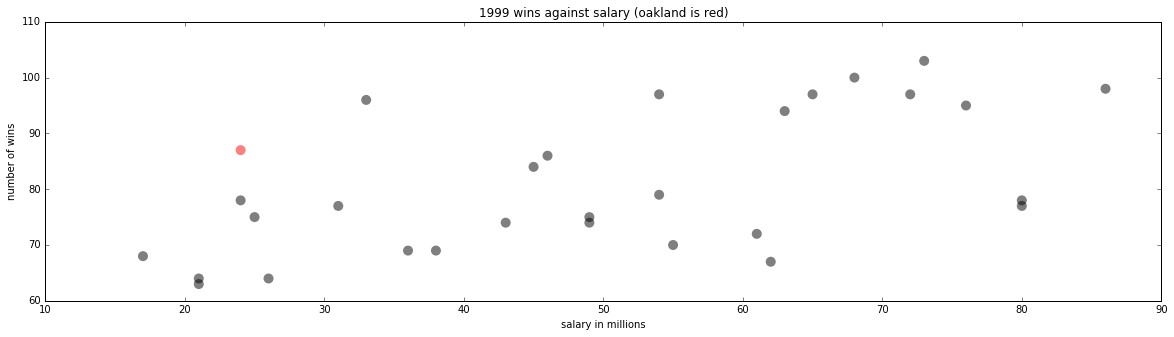

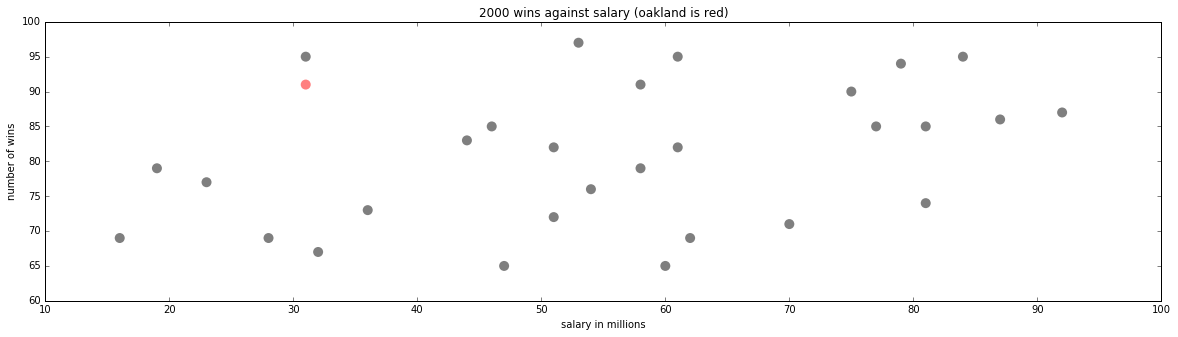

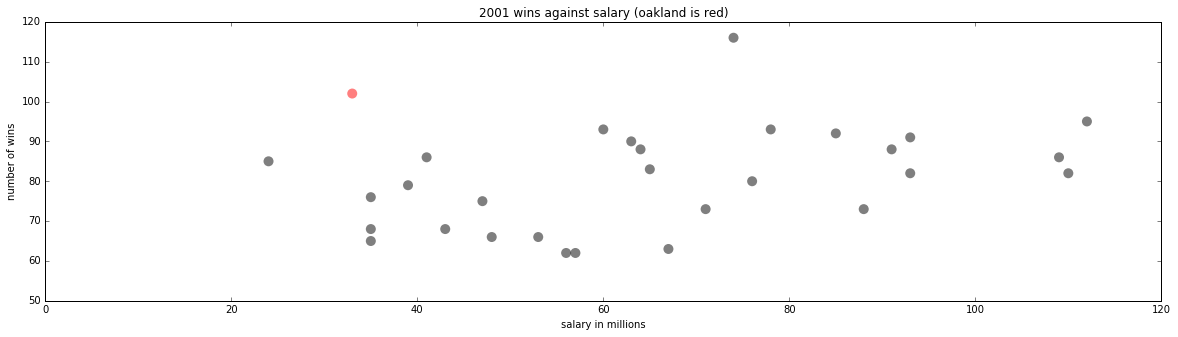

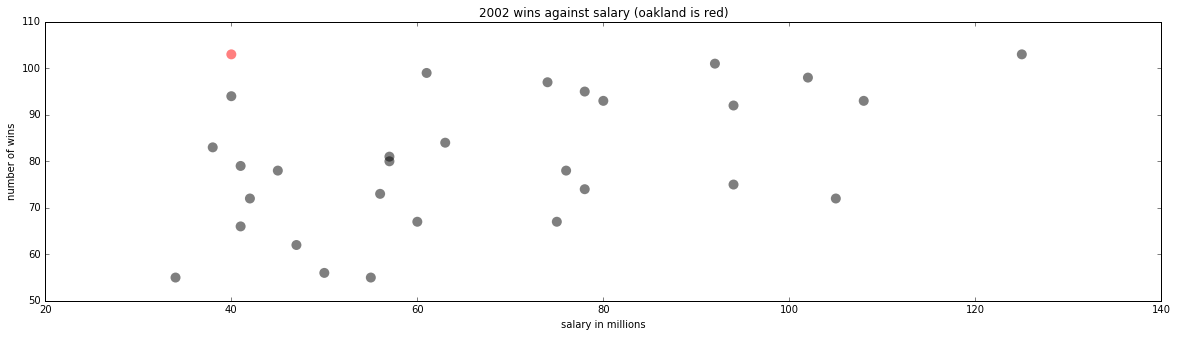

In [7]:
#Question 1d:
#Make the data usable for the plots
data = organized.reset_index()
#Get the data for a given year
for year in range(1999,2003):
    year_data = data[data.yearID==year]
    win_data = year_data['W']
    salary_data = year_data['salary']
    team_data = year_data['teamID']
    #Make a plot for the year
    Xaxis = np.divide(salary_data.values, 1000000)
    Yaxis = win_data.values
    different_color = ['red' if team=='OAK' else 'black' for team in team_data.values]

    plt.scatter(Xaxis,Yaxis, c=different_color, s=100, alpha=0.5, edgecolors='none')
    plt.title(str(year) + ' wins against salary (oakland is red)')    
    plt.xlabel('salary in millions')
    plt.ylabel('number of wins')
    plt.figure()


plt.show()

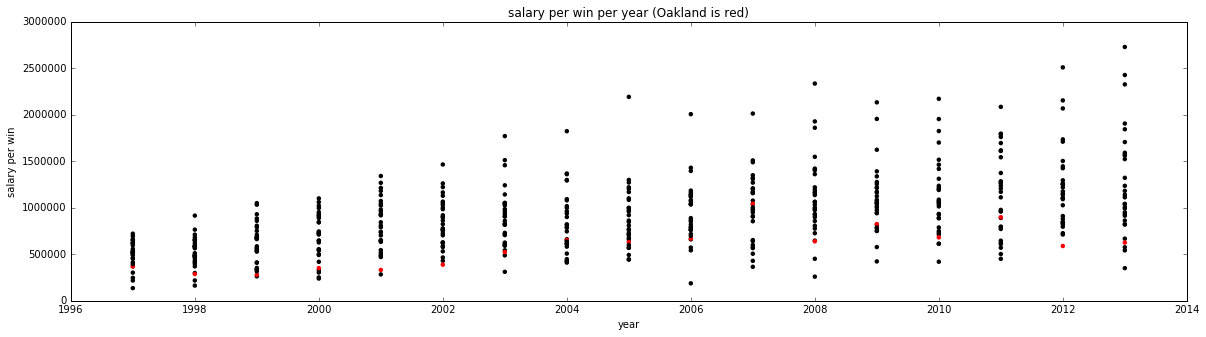

In [8]:
#Question 1d:
#Make the data usable for the plots
data = organized.reset_index()
#Get the data for a given year
for year in range(1997,2014):
    year_data = data[data.yearID==year]
    for item in year_data.values:
        team = item[0]
        oak = year_data[year_data.teamID==team]
        win_data = oak['W']
        salary_data = oak['salary']
        salary_per_win = np.divide(salary_data,win_data)
        team_data = year_data['teamID']
        Xaxis = year
        Yaxis = salary_per_win
        if team=='OAK':
            plt.scatter(Xaxis,Yaxis, c='red', edgecolors='none')
        else:
            plt.scatter(Xaxis,Yaxis, c='black', edgecolors='none')

plt.title('salary per win per year (Oakland is red)')    
plt.xlabel('year')
plt.ylabel('salary per win')
plt.show()

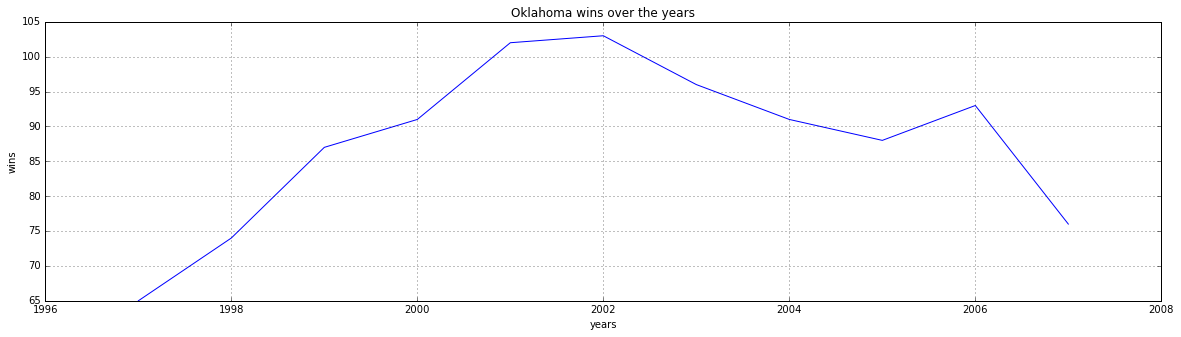

In [20]:
first = 1997
last = 2007

oak_data = data[(data.yearID>=first) & (data.yearID<=last)]
oak_wins = oak_data[oak_data.teamID=='OAK']
years = oak_wins.loc[:,[ 'yearID']].values
wins = oak_wins.loc[:,[ 'W']].values
plt.plot(years, wins)   
plt.title('Oklahoma wins over the years')
plt.ylabel('wins')
plt.xlabel('years')
plt.grid(True)
plt.show()

### Discusion for problem 1:

Uit de data wordt nu zichtbaar wat het verband is tussen het salaris van spelers in een team en de hoeveelheid wins die ze in een jaar halen. Het wordt duidelijk dat vooral in 2001 het beste jaar was voor Oakland, omdat hier de verhouding tussen salaris en wins het beste was, ze haalden namelijk heel veel wins, voor een laag teamsalaris.

## N1

* Vind voor elke naam het totaal aantal jongens en het totaal aantal meisjes met die naam (totalen dus genomen over alle jaren)
* Dit is natuurlijk weer een pivot table
* We willen ook de totalen erbij
* Orden de namen omgekeerd op het aantal keer dat ze voorkomen

Je tabel moet er zo uitzien:
* kolommen: sex	F	M	All
* Rijen: ALL, gevolgd door de namen, 

```
sex	F	M	All
name			
All	159990140	162412587	322402727
James	23044	5049727	5072771
John	21578	5040319	5061897
Robert	20055	4767995	4788050
Michael	21470	4243903	4265373
```


In [23]:
years = range(1880,  2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns, engine='python')

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
total = names.loc[:,['name', 'sex', 'births']]

In [26]:
table = pd.pivot_table(names, values='births', index=['name'],columns=['sex'], aggfunc=np.sum).sort_values('M',ascending=False)
total_each_name = total.groupby('name').sum().sort_values('births',ascending=False )
table = table.join(total_each_name)
count_per_sex = total.groupby('sex').sum().sort_values('births',ascending=False )
male = count_per_sex.iloc[0]['births']
female = count_per_sex.iloc[1]['births']
first = pd.DataFrame([[female, male,count_per_sex.sum()['births']]], columns=['F', 'M', 'births'])
first.index.name = 'name'
table = table.append(first).rename(index={0: 'All'}).sort_values('births',ascending=False)
table = table.rename(columns = {'births':'all'})
table.head()

sex              F          M        all
name                                    
All      159990140  162412587  322402727
James        23044    5049727    5072771
John         21578    5040319    5061897
Robert       20055    4767995    4788050
Michael      21470    4243903    4265373

# N2

* Now we want to find the most gender ambiguous names.
* How can we do that? An intuitive measure is to take the logarithm of the number of males divided by the number of females. 
    * If it is close to 0, the name is very ambiguous
    * if it is negative, it is a more femalish name
    * if it is positive it is a more malish name
    * if we take logarithm with base 2, then a value of $+n$, for a name $N$, means that $N$ is used $2^n$ more often for males than for females. E.g., for $n=4$, this means 16 times. 
   
### Your task
* Add a column `ratio` to your just created dataframe in which you divide the male by the female totals
* Using `np.log` and pandas `apply` method (and possibly $\lambda$ abstraction), compute the log measure.
* Print out the top 20 most ambiguous names. Take those names with a "log-value" between $-0.1$ and $0.1$ and sort them reversely on the total number of babies with that name.



In [52]:
def funct(x):
    return np.log(x[1]/x[0])
table["ratio"] = table.apply(funct,axis=1)
table.sort_values('ratio',ascending=False)
table[(table['ratio'] >= -0.1) & (table['ratio'] <= 0.1)].sort_values('all',ascending=False)[:20]

sex                F          M        all     ratio
name                                                
All        159990140  162412587  322402727  0.015028
Kerry          48303      49163      97466  0.017648
Robbie         22161      20394      42555 -0.083093
Kris           13372      13536      26908  0.012190
Unknown         8983       8771      17754 -0.023883
Amari           9101       8505      17606 -0.067730
Ivory           7348       8057      15405  0.092113
Baby            5738       5966      11704  0.038966
Infant          3753       4052       7805  0.076655
Campbell        3570       3404       6974 -0.047614
Michal          3384       3500       6884  0.033705
Ardell          2635       2387       5022 -0.098846
Kodi            2030       2072       4102  0.020479
Natividad       1868       1708       3576 -0.089545
Ellison         1653       1748       3401  0.055880
Kiran           1511       1482       2993 -0.019379
Kalin           1377       1518       2895  0.097486
Christan        1361       1269       2630 -0.069991
Dann            1145       1090       2235 -0.049227
Karsen          1077       1135       2212  0.052453

# N3

* We now want a dataframe containing non-ambiguous names.
* Do two things.

1. Add a column `gender` to your dataframe in which you store the winning gender.
2. Restrict the dataframe to those names which occur at least 10.000 times and are used at least 16 times more for one gender than for the other.
    * How many names are left?
    * How many males and how many females?
3. Store this as a csv file.
3. Suppose we classify all children with the names from this csv file according to the gender column. Clearly we make some mistakes then (that is, for example  a boy named Sue is classified as a girl). Calculate the expected maximum percentage of mistakes, and also calculated the actual percentage of mistakes.



In [84]:
new = table[(table['all'] >= 10000) & ((table['F']-table['M'] >= 16) | (table['M']-table['F'] >= 16))]
new['gender'] = new.loc[:,['F', 'M']].idxmax(axis=1)

print 'Er zijn:',len(new),'namen overgebleven'
females = pd.value_counts(new['gender'].values)[0]
males = pd.value_counts(new['gender'].values)[1]
print 'Er zijn:', females,'vrouwen namen en:',males,'mannen namen'
new.to_csv('classification.csv', sep=',')

Er zijn: 2065 namen overgebleven
Er zijn: 1154 vrouwen namen en: 911 mannen namen


C:\Users\niek\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [97]:
#Actual percentage is hier hoeveel procent van de namen fout zijn ingedeeld, bij zeer ambigue namen zal het dus dichter bij
#de 100% liggen
def actual(x):
    if x[4] == 'F':
        return (x[1]/x[2])*100
    if x[4] == 'M':
        return (x[0]/x[2])*100
new['actual percentage'] = new.apply(actual,axis=1)
new.head()

sex              F          M        all     ratio gender  actual percentage
name                                                                        
All      159990140  162412587  322402727  0.015028      M          49.624314
James        23044    5049727    5072771  5.389684      M           0.454268
John         21578    5040319    5061897  5.453550      M           0.426283
Robert       20055    4767995    4788050  5.471203      M           0.418855
Michael      21470    4243903    4265373  5.286582      M           0.503356

In [108]:
#Om te zien hoeveel procent we over het totaal verkeerd hebben toegewezen:
def total(x):
    if x[4] == 'M':
        return x[0]
    if x[4] =='F':
        return x[1]
new['wrong gender'] = new.apply(total,axis=1)
new = new.drop(new.index[[0]])

sum_wrong = sum(new['wrong gender'])
print 'Number of times the wrong gender was assigned:',sum_wrong
sum_total = sum(new['all'])
print 'Total names:',sum_total
percentage_wrong = (sum_wrong/sum_total)*100
print 'Het echte percentage van verkeerd toegewezen namen:',percentage_wrong,'%'

Number of times the wrong gender was assigned: 5197542.0
Total names: 274739912
Het echte percentage van verkeerd toegewezen namen: 1.89180449326 %
